In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as SVR
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv("ETHUSD.csv",index_col=[0],parse_dates=[0],dayfirst = True)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [ ]:
projection = 5

In [ ]:
df["Prediction"] = df["Close"].shift(-projection)

In [ ]:
df.tail(10)

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,4610831509,1650.519287
2023-06-10,1840.391968,1844.785645,1721.443115,1752.384766,10788500406,1665.519775
2023-06-11,1752.527588,1776.847168,1741.110474,1753.415283,4559112981,1716.668823
2023-06-12,1753.075439,1757.659790,1722.906372,1742.528687,6031384958,1727.204102
2023-06-13,1742.390137,1761.955444,1727.749878,1739.037598,6214125203,1720.577515
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534,NaN
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880,NaN
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479,NaN
2023-06-17,1716.671753,1766.763184,1714.150879,1727.204102,4875187477,NaN


In [ ]:
x = np.array(df["Close"])
x = x[:-projection]

In [ ]:
df.shape

(2048, 6)

In [ ]:
print(x)
print(len(x))

[ 320.88400269  299.25299072  314.68099976 ... 1753.4152832  1742.52868652
 1739.03759766]
2043


In [ ]:
y = np.array(df["Prediction"])
y = y[:-projection]

In [ ]:
y

array([ 337.63101196,  333.35699463,  330.92401123, ..., 1716.66882324,
       1727.20410156, 1720.57751465])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf",C=1e3,gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=1e-05)

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test,y_test)

In [ ]:
svr_rbf_confidence

0.9774258393829973

In [ ]:
svr_rbf_prediction = svr_rbf.predict(x_test)

In [ ]:
svr_rbf_prediction

array([ 132.13998782,  348.7946292 ,  448.11613212,  294.37517486,
       3031.32585075, 4310.86621666, 3055.18059734,  252.27121529,
       1255.58541437, 1215.07126218,  229.21078909,  685.51323105,
       1227.05999414,  191.31028834,  750.30598256,  137.19968807,
       4313.92043483, 1238.69549857,  204.29921883,  594.67724264,
       3151.79892613,  170.93361247,  464.3867386 , 3086.91780478,
       3986.48245559,  269.74727092,  124.52809483, 4315.02765679,
        239.3995178 , 1524.90472596,  142.45096639,  482.63319194,
       1874.35153229, 1387.43028027,  202.11870446, 3464.53543247,
        146.63045327,  304.44148612, 1356.28399236,  318.03020046,
        134.56728685, 1854.37485736,  367.08159135, 4280.01657385,
        898.88891094, 1754.46837787, 1306.96643503,  170.24323844,
       2286.70442235, 2108.93773781,  394.46392446, 3982.11063348,
        136.98839984,  287.7712618 ,  147.08742122, 1635.13331052,
       1195.89896799,  465.34001317, 1149.70056783,  161.69376

In [ ]:
y_pred = svr_rbf_prediction

In [ ]:
y_pred

array([ 132.13998782,  348.7946292 ,  448.11613212,  294.37517486,
       3031.32585075, 4310.86621666, 3055.18059734,  252.27121529,
       1255.58541437, 1215.07126218,  229.21078909,  685.51323105,
       1227.05999414,  191.31028834,  750.30598256,  137.19968807,
       4313.92043483, 1238.69549857,  204.29921883,  594.67724264,
       3151.79892613,  170.93361247,  464.3867386 , 3086.91780478,
       3986.48245559,  269.74727092,  124.52809483, 4315.02765679,
        239.3995178 , 1524.90472596,  142.45096639,  482.63319194,
       1874.35153229, 1387.43028027,  202.11870446, 3464.53543247,
        146.63045327,  304.44148612, 1356.28399236,  318.03020046,
        134.56728685, 1854.37485736,  367.08159135, 4280.01657385,
        898.88891094, 1754.46837787, 1306.96643503,  170.24323844,
       2286.70442235, 2108.93773781,  394.46392446, 3982.11063348,
        136.98839984,  287.7712618 ,  147.08742122, 1635.13331052,
       1195.89896799,  465.34001317, 1149.70056783,  161.69376

In [ ]:
y_test

array([[ 123.54706573],
       [ 350.7661438 ],
       [ 509.74456787],
       [ 287.99752808],
       [3104.10644531],
       [4607.19384766],
       [3014.84594727],
       [ 269.45568848],
       [1335.32019043],
       [1250.43859863],
       [ 221.3334198 ],
       [ 538.64398193],
       [1191.52624512],
       [ 181.40606689],
       [1041.68005371],
       [ 138.03450012],
       [4358.73730469],
       [1520.20068359],
       [ 185.9128418 ],
       [ 577.64501953],
       [3226.08398438],
       [ 169.95617676],
       [ 441.7210083 ],
       [3179.87719727],
       [4119.81591797],
       [ 262.33172607],
       [ 108.90753937],
       [4730.38427734],
       [ 245.16725159],
       [1086.51928711],
       [ 135.03102112],
       [ 462.43600464],
       [1577.00378418],
       [1279.57568359],
       [ 123.30602264],
       [3761.38037109],
       [ 122.60388947],
       [ 282.9670105 ],
       [1314.29919434],
       [ 330.92401123],
       [ 144.30415344],
       [1995.060

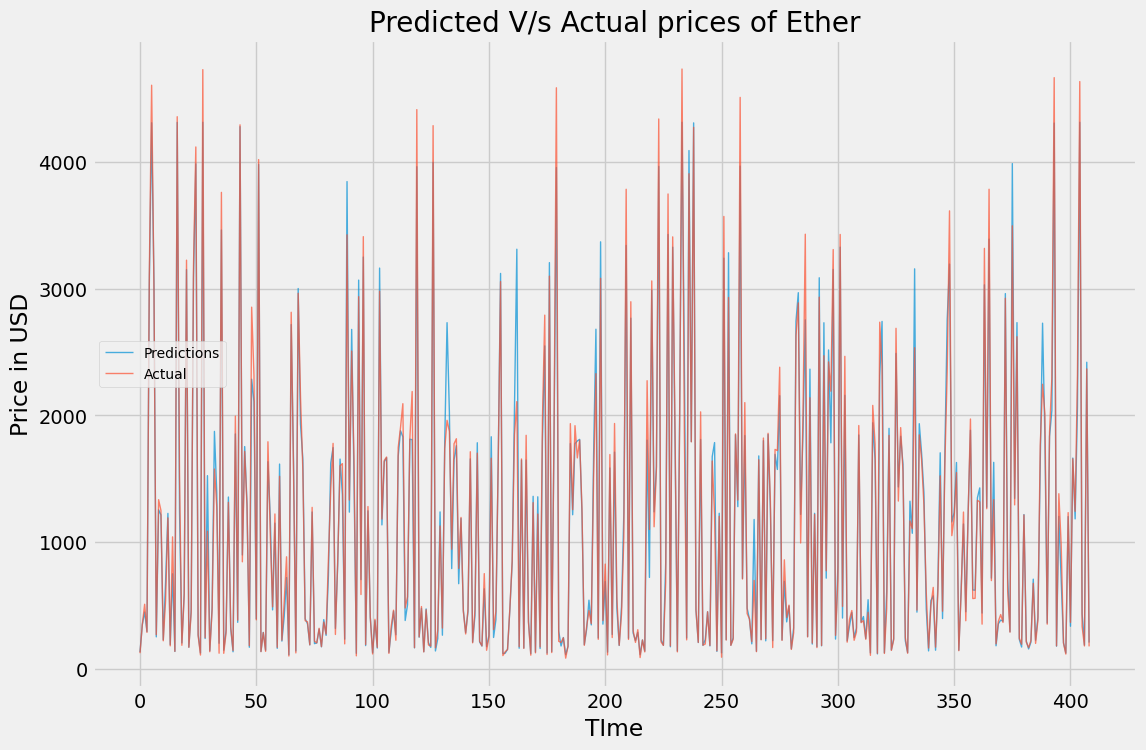

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(svr_rbf_prediction,label="Predictions",lw=1,alpha=0.7)
plt.plot(y_test,label="Actual",lw=1,alpha=0.7)
plt.legend(fontsize = 10)
plt.title("Predicted V/s Actual prices of Ether")
plt.xlabel("TIme")
plt.ylabel("Price in USD")
plt.show()

In [ ]:
sum_residual = 0
for i in range(len(y_test)):
  sum_residual = sum_residual + (y_test[i][0] - y_pred[i])**2


In [ ]:
sum1 = 0
for i in range(len(y_test)):
  sum1 = sum1 + y_test[i][0]
mean = sum1/len(y_test)

In [ ]:
mean

1188.548883675946

In [ ]:
sum_total = 0
for i in range(len(y_test)):
  sum_total = sum_total + (y_test[i][0] - mean)**2

In [ ]:
r_squared = 1 - (sum_residual/sum_total)

In [ ]:
r_squared

0.9774258393829973

In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred)

In [ ]:
R_squared

0.9774258393829973